<font size="5"> Zillow Property Value Predictions</font> <br><br>
<font size="5"> Description </font><br><br>
<font size="5"> Goals </font>


In [1]:
# imports:

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor


from prepare import zillow_pipeline
from explore import perform_spearmanr_test, feature_selections_results, MinMax_Scaler
from visuals import plot_value_distribution, area_vs_value_plt, age_vs_value_plt, bedr_vs_value_plt, bathr_vs_value_plt, county_vs_value_plt
from model import data_pipeline, eval_baseline, train_model, poly_features, test_model

<font size="5">Acquire</font>
<br>
<br>
<font size="5">Prepare</font>
<br>
<br>
<font size="5">Dictionary</font><br>

<font size="4">A brief look at the data</font><br>

In [2]:
df = zillow_pipeline()
df.head()

,bedrooms,bathrooms,area,value,year,county,state
0,4,3.5,3100,1023282,1998,Orange,CA
1,2,1.0,1465,464000,1967,Ventura,CA
2,3,2.0,1243,564778,1962,Orange,CA
3,4,3.0,2376,145143,1970,Los Angeles,CA
4,4,3.0,2962,773303,1950,Los Angeles,CA


<font size="5">Explore</font><br>

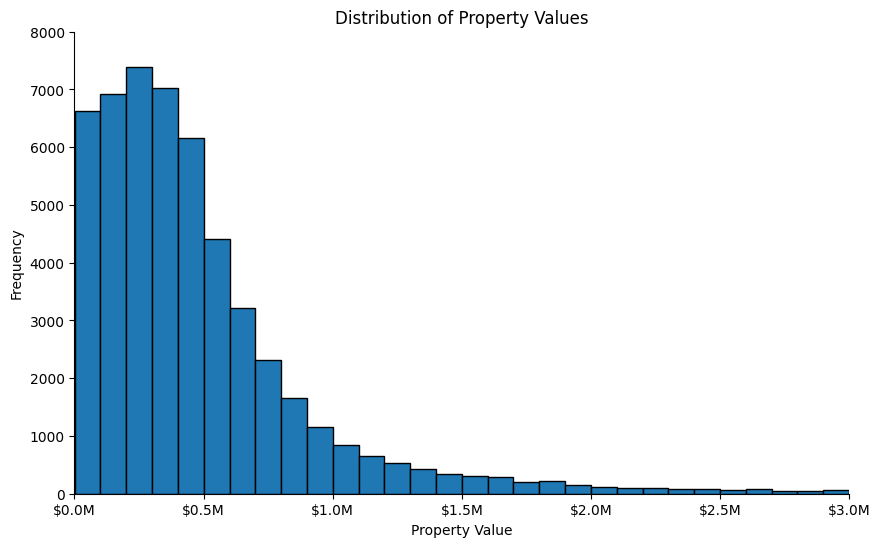

In [3]:
# Display overall value distribution
plot_value_distribution(df)

1. **Hypothesis 1: Property Size Impact**


   - *Question:* Does the size of a property impact its value?


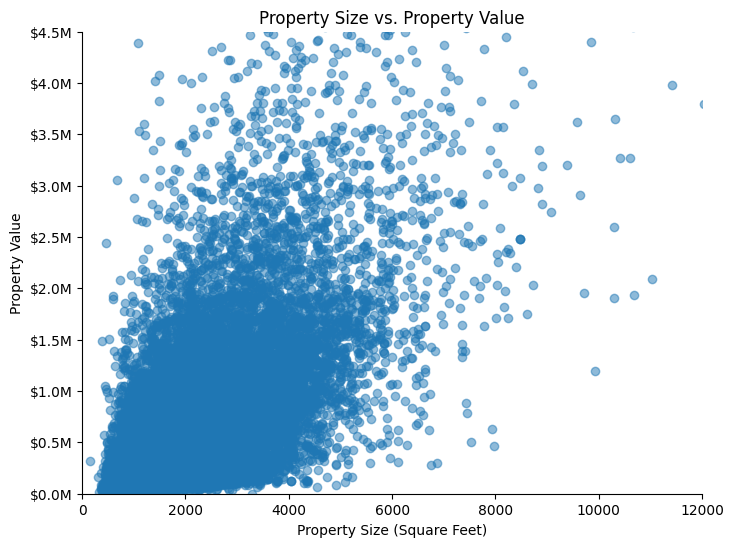

In [4]:
area_vs_value_plt(df)

   - *Null Hypothesis (H0):* There is no significant relationship between property size (square footage) and property value.
   - *Alternative Hypothesis (H1):* Property size (square footage) is significantly related to property value.


In [5]:
perform_spearmanr_test(df,'area')

Result: There is a significant monotonic relationship between area and value (p-value=0.0).



2. **Hypothesis 2: Property Age Influence**


   - *Question:* Does the age of a property, based on the year it was built, influence its value?


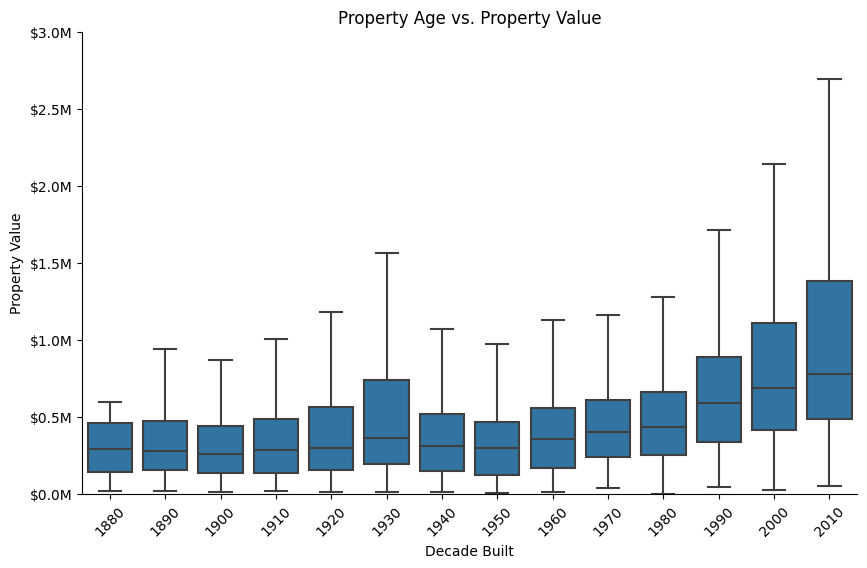

In [6]:
age_vs_value_plt(df)

   - *Null Hypothesis (H0):* There is no significant relationship between the age of a property (year built) and property value.
   - *Alternative Hypothesis (H1):* The age of a property (year built) is significantly related to property value.


In [7]:
perform_spearmanr_test(df,'year')

Result: There is a significant monotonic relationship between year and value (p-value=0.0).



3. **Hypothesis 3: Bedroom and Bathroom Count**


   - *Question:* Do properties with a higher number of bedrooms and bathrooms tend to have higher values?


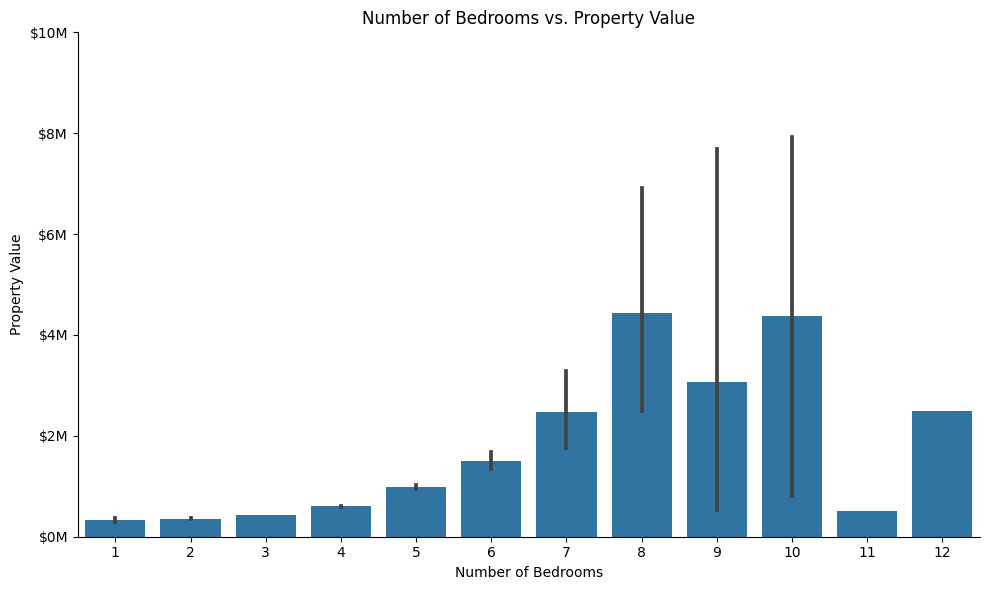

In [8]:
bedr_vs_value_plt(df)

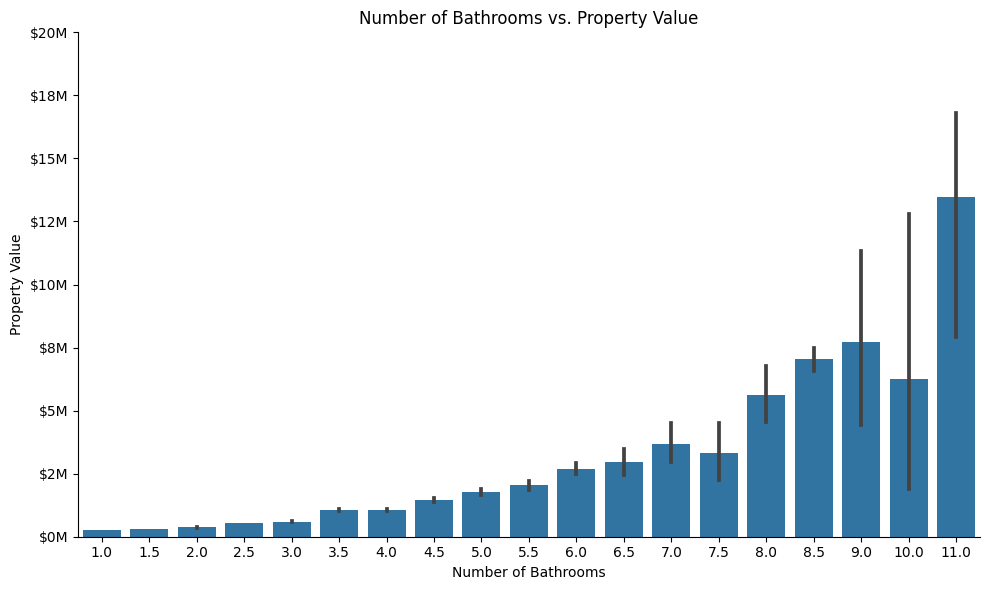

In [9]:
bathr_vs_value_plt(df)

   - *Null Hypothesis (H0):* There is no significant relationship between the number of bedrooms or bathrooms and property value.
   - *Alternative Hypothesis (H1):* The number of bedrooms or bathrooms is significantly related to property value.


In [10]:
perform_spearmanr_test(df,'bedrooms')
perform_spearmanr_test(df,'bathrooms')

Result: There is a significant monotonic relationship between bedrooms and value (p-value=0.0).
Result: There is a significant monotonic relationship between bathrooms and value (p-value=0.0).



4. **Hypothesis 4: Location Matters**


   - *Question:* Does the location of a property impact its value?


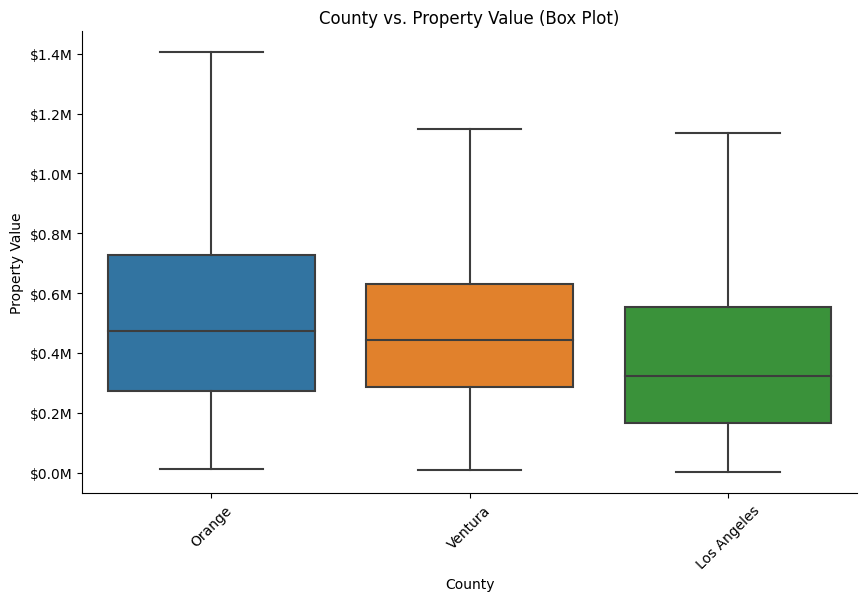

In [11]:
county_vs_value_plt(df)

   - *Null Hypothesis (H0):* There is no significant relationship between the location of a property (county or state) and property value.
   - *Alternative Hypothesis (H1):* The location of a property (county or state) is significantly related to property value.

In [12]:
perform_spearmanr_test(df,'county')

Result: There is a significant monotonic relationship between county and value (p-value=0.0).


In [13]:
feature_selections_results(df, 'value', 3)

,Kbest,RFE,Lasso
0,area,bedrooms,bedrooms
1,bathrooms,bathrooms,bathrooms
2,bedrooms,year,year


<font size="5">Exploration Summary</font><br>

We perfomred pearsonr test on Area, Year built, Bedrooms, Bathrooms and County. All test indicated a significant monotonic relationship to value (p-value=0.0).

We also perfomred feature selection using SelectKbest, RFE and LASSO methods which reulted in Area, Bedrooms and Bathrooms as the top 3 features. 

<font size="5">Features I am moving to modeling With</font><br>

- Area
- Bedrooms
- Bathrooms


evaluation metric for regression models, the Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE)

<font size="5">Modeling</font><br>

- I will use the Root Mean Squared Error (RMSE) as my evaluation metric for regression models.
- Models will be evaluated on train and validate data
- Baseline RMSE is $755,431.57 on train data
- The model that performs the best will then be evaluated on test data


<font size="3">Splitting / processed the data</font><br><br>
Preprocesses a DataFrame for machine learning by dropping 'county' and 'state' columns,
and splitting it into into a 70% training set, a 15% validation set, and a 15% test set.<br>
The function also separates features (X) and labels (y) for the training and validation sets.<br>
After splitting, the data is further processed by scaling it using Min-Max scaling.


In [14]:
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = data_pipeline(df)

Calculate the Root Mean Squared Error (RMSE) between actual target values and baseline predictions. The baseline prediction is computed as the mean of the actual target values (y_train).

In [15]:
eval_baseline(y_train)

755431.5736908859

<font size="3">XGBoost</font><br><br>


In [16]:
model_results = train_model(XGBRegressor, X_train, y_train, X_val, y_val)

The train RMSE is $359,555.25.
The validate RMSE is $561,749.00.


<font size="3">Polynomial Features</font><br><br>

 transforming the original features of a dataset into a set of polynomial features.


In [17]:
X_train, X_val, X_test = poly_features(X_train, X_val, X_test)

In [18]:
X_train.shape

(36572, 15)

<font size="3">LinearRegression</font><br><br>

In [19]:
model_results = train_model(LinearRegression, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $535,895.25.
The validate RMSE is $546,198.72.


<font size="3">LassoLars</font><br><br>

In [20]:
model_results = train_model(LassoLars, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $535,897.66.
The validate RMSE is $546,079.77.


<font size="3">RMSE Results</font><br><br>

In [21]:
model_results

,Model,Train_RMSE,Val_RMSE
0,XGBRegressor,"$359,555.25","$561,749.00"
1,LinearRegression,"$535,895.25","$546,198.72"
2,LassoLars,"$535,897.66","$546,079.77"


<font size="5">Comparing Models</font><br><br>

 - XGBoos, LinearRegression, and LassoLars models all performed better than baseline.
 - Because the results of the models were all very similar I could proceed to test with any of these models.
 - I have chosen to move forward with the LassoLars model as it had a the best predictive performance.

<font size="5">LassoLars on Test Data</font><br><br>

In [22]:
test_results = test_model(LassoLars, X_train, y_train, X_test, y_test)

The test RMSE is $537,396.91.


<font size="5">Modeling Summary</font><br><br>

 - LassoLars model scored RMSE $537,396.91.compared to the baseline of $755,431.57, it had an improvement of $218,034.

<font size="5">Conclusions</font><br><br>

 - We found a stron relationship between bathrooms, bedrooms and area to the value of the property.
 - The final model significantly outperfomred the baseline.

<font size="5">Recomendations</font><br><br>

 - We found a stron relationship between bathrooms, bedrooms and area to the value of the property. 